# ***Importing Libraries***

In [50]:
# 1. Importing Necessary Libraries
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib
import zipfile
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier


In [5]:
from google.colab import files

uploaded = files.upload()


Saving AI_Zip.zip to AI_Zip.zip


In [7]:
import os
print(os.listdir())


['.config', 'drive', 'AI_Zip.zip', 'sample_data']


In [8]:

# اسم ملف الـ ZIP
zip_file_name = "AI_Zip.zip"
extract_folder = "AI_extracted_files"

# المسار الحالي
current_directory = os.getcwd()
zip_path = os.path.join(current_directory, zip_file_name)
extract_path = os.path.join(current_directory, extract_folder)

# فك الضغط
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed successfully.")
print("📂 Extracted files:")
print(os.listdir(extract_path))

✅ Extraction completed successfully.
📂 Extracted files:
['AI']


In [4]:
from google.colab import drive
import pandas as pd

# Mount Drive
drive.mount('/content/drive')

csv_path = "/content/drive/MyDrive/prepared_data.csv"

df_merged = pd.read_csv(csv_path)

print("✅ Data loaded successfully!")
df_merged.head()

Mounted at /content/drive
✅ Data loaded successfully!


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label,dx,age,sex,localization
0,169,171,170,177,181,182,181,185,194,192,...,157,140,140,159,165,0,bkl,80.0,male,scalp
1,19,57,105,140,149,148,144,155,170,170,...,114,89,47,18,18,0,bkl,80.0,male,scalp
2,155,163,161,167,167,172,155,152,165,175,...,167,148,141,136,115,0,bkl,80.0,male,scalp
3,25,71,116,139,136,153,148,161,172,162,...,111,71,32,16,16,0,bkl,80.0,male,scalp
4,129,162,181,196,205,208,205,213,225,224,...,195,193,181,147,88,0,bkl,75.0,male,ear


# ***Reading Data***

In [9]:
# 3. Loading and Preprocessing Data
# Define dataset folder (correct path)
hmnist_path = "/content/AI_extracted_files/AI/hmnist_28_28_L.csv"
ham_metadata_path = "/content/AI_extracted_files/AI/HAM10000_metadata.csv"

# Read each CSV into its own DataFrame
df_pixels = pd.read_csv(hmnist_path)
df_data = pd.read_csv(ham_metadata_path)

# Show confirmation + sample rows
print("✅ Loaded CSV files successfully.\n")

print("🔹 hmnist_28_28_L.csv (first 5 rows):")
df_pixels.head(), "\n"

print("🔹 HAM10000_metadata.csv (first 5 rows):")
df_data.head()

✅ Loaded CSV files successfully.

🔹 hmnist_28_28_L.csv (first 5 rows):
🔹 HAM10000_metadata.csv (first 5 rows):


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


# ***EDA***

In [10]:
df_pixels.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2


In [11]:
print("Pixels CSV shape:",)
df_pixels.shape

Pixels CSV shape:


(10015, 785)

In [12]:
print("Metadata shape:",)
df_data.shape

Metadata shape:


(10015, 7)

In [13]:

print("\nMissing values in pixels CSV:\n",)
df_pixels.isnull().sum().sum()



Missing values in pixels CSV:



np.int64(0)

In [14]:
print("\nMissing values in metadata:\n",)
df_data.isnull().sum()


Missing values in metadata:



,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [16]:
df_pixels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 785 entries, pixel0000 to label
dtypes: int64(785)
memory usage: 60.0 MB


In [19]:
print(df_merged.columns)


Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel0779', 'pixel0780', 'pixel0781', 'pixel0782', 'pixel0783',
       'label', 'dx', 'age', 'sex', 'localization'],
      dtype='object', length=789)


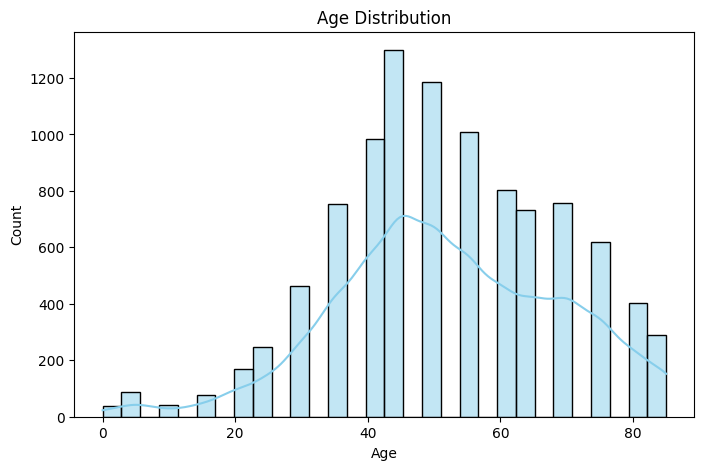

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_data["age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

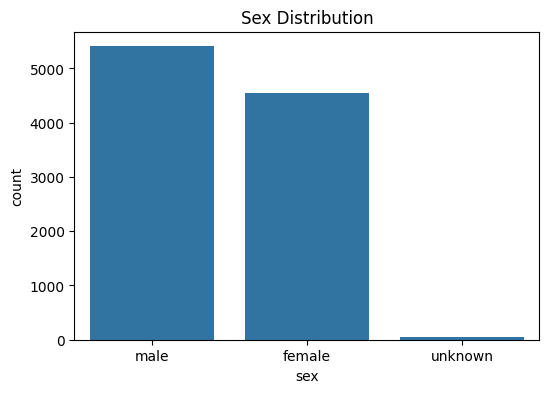

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df_data)
plt.title("Sex Distribution")
plt.show()

# ***Merge Data***

In [47]:
df_pixels = pd.read_csv(hmnist_path)
df_data = pd.read_csv(ham_metadata_path)

# Use pd.concat to merge the two DataFrames side-by-side
# This is the most reliable method since the files are not aligned by a key
df_merged = pd.concat([df_pixels, df_data], axis=1)

# Now, clean the merged DataFrame
# Drop 'image_id' as it's not a feature and 'dx' as we have 'dx_type'
df_merged = df_merged.drop(['image_id', 'dx'], axis=1)

print("✅ Data merged successfuly")
df_merged.head()

✅ تم دمج البيانات بنجاح.


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0780,pixel0781,pixel0782,pixel0783,label,lesion_id,dx_type,age,sex,localization
0,169,171,170,177,181,182,181,185,194,192,...,140,140,159,165,2,HAM_0000118,histo,80.0,male,scalp
1,19,57,105,140,149,148,144,155,170,170,...,89,47,18,18,2,HAM_0000118,histo,80.0,male,scalp
2,155,163,161,167,167,172,155,152,165,175,...,148,141,136,115,2,HAM_0002730,histo,80.0,male,scalp
3,25,71,116,139,136,153,148,161,172,162,...,71,32,16,16,2,HAM_0002730,histo,80.0,male,scalp
4,129,162,181,196,205,208,205,213,225,224,...,193,181,147,88,2,HAM_0001466,histo,75.0,male,ear


In [ ]:
print("🔹 hmnist_28_28_L.csv (first 5 rows):")
df_merged.head()


🔹 hmnist_28_28_L.csv (first 5 rows):


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label,dx,age,sex,localization
0,169,171,170,177,181,182,181,185,194,192,...,157,140,140,159,165,0,bkl,80.0,male,scalp
1,19,57,105,140,149,148,144,155,170,170,...,114,89,47,18,18,0,bkl,80.0,male,scalp
2,155,163,161,167,167,172,155,152,165,175,...,167,148,141,136,115,0,bkl,80.0,male,scalp
3,25,71,116,139,136,153,148,161,172,162,...,111,71,32,16,16,0,bkl,80.0,male,scalp
4,129,162,181,196,205,208,205,213,225,224,...,195,193,181,147,88,0,bkl,75.0,male,ear


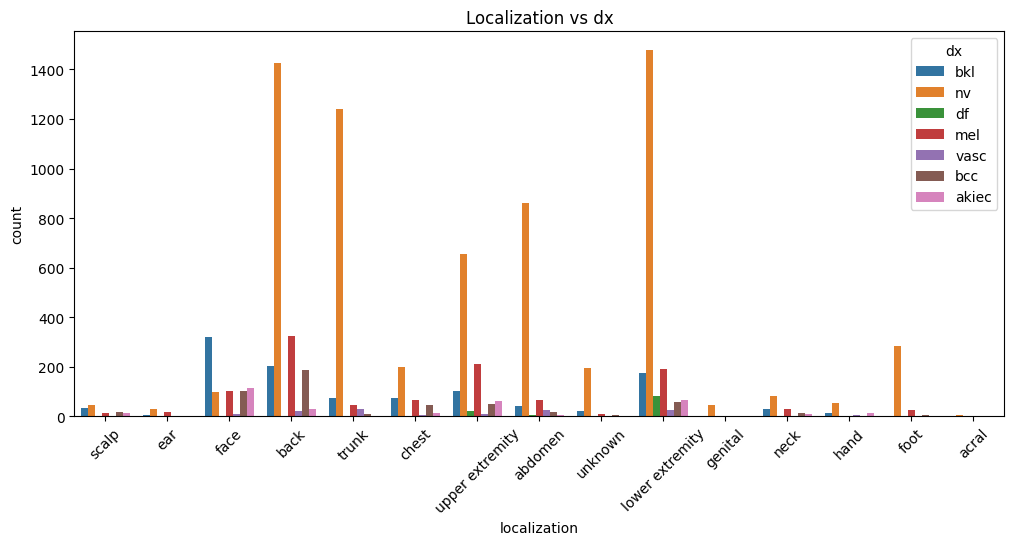

In [31]:
# 7️⃣ Localization vs dx
plt.figure(figsize=(12,5))
sns.countplot(x='localization', hue='dx', data=df_merged)
plt.title("Localization vs dx")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3148506831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


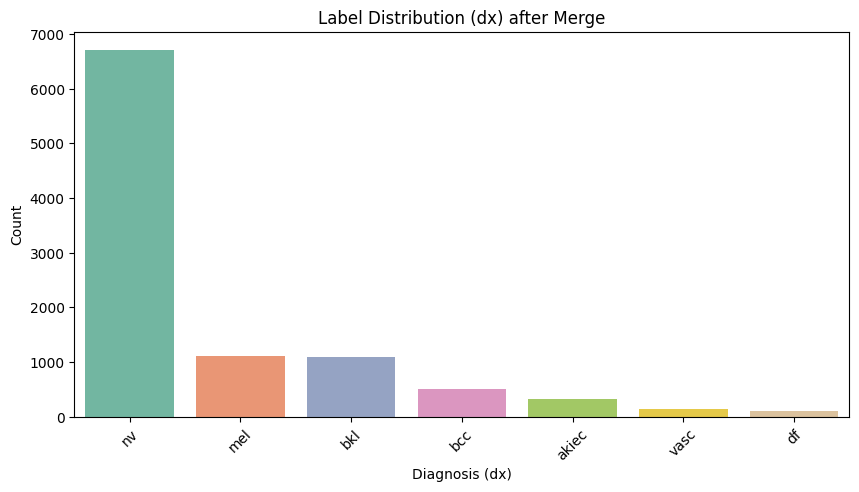

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(
    x='dx',
    data=df_merged,
    order=df_merged['dx'].value_counts().index,
    palette="Set2"
)
plt.title("Label Distribution (dx) after Merge")
plt.xlabel("Diagnosis (dx)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


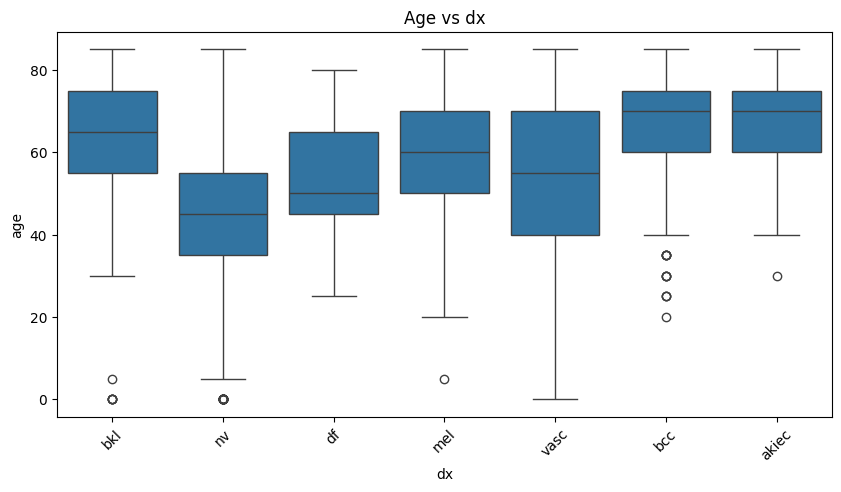

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dx', y='age', data=df_merged)
plt.title("Age vs dx")
plt.xticks(rotation=45)
plt.show()

In [ ]:
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


/content/AI_extracted_files/AI/ml-preperation (2).ipynb
/content/AI_extracted_files/AI/hmnist_28_28_L.csv
/content/AI_extracted_files/AI/HAM10000_metadata.csv


# ***Data Cleaning***

In [41]:
# --- Detect Outliers in Age using IQR ---
Q1 = df_merged['age'].quantile(0.25)
Q3 = df_merged['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_merged[(df_merged['age'] < lower_bound) | (df_merged['age'] > upper_bound)]
print("عدد الـ outliers في age:", outliers.shape[0])


عدد الـ outliers في age: 39


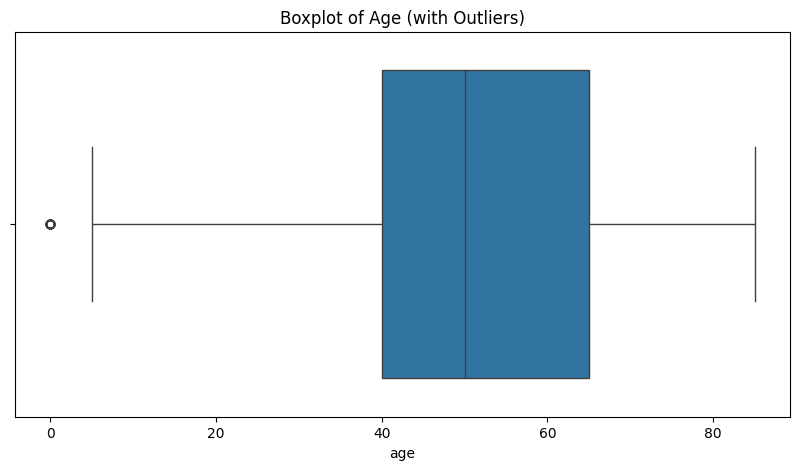

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_merged['age'])
plt.title("Boxplot of Age (with Outliers)")
plt.show()


In [43]:
df_winsor = df_merged.copy()
df_winsor.loc[df_winsor['age'] < lower_bound, 'age'] = lower_bound
df_winsor.loc[df_winsor['age'] > upper_bound, 'age'] = upper_bound


In [44]:
# -----------------------------
# Pixel data already has labels in Kaggle HAM10000 CSVs
# The label column is usually named 'label' or similar
# -----------------------------

# لو العمود اسمه "label" أو "dx" هنستخدمه
if "label" in df_pixels.columns:
    y = df_pixels["label"]
    X = df_pixels.drop("label", axis=1)
elif "dx" in df_pixels.columns:
    y = df_pixels["dx"]
    X = df_pixels.drop("dx", axis=1)
else:
    raise ValueError("No label column found in pixels CSV!")

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (10015, 784)
Target shape: (10015,)


In [45]:
#4. Labels and features
# -----------------------------
if "label" in df_pixels.columns:
    y = df_pixels["label"]
    X_pixels = df_pixels.drop("label", axis=1).values
elif "dx" in df_pixels.columns:
    y = df_pixels["dx"]
    X_pixels = df_pixels.drop("dx", axis=1).values
else:
    raise ValueError("No label column found in pixels CSV!")

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [46]:
# # -----------------------------
# 5. Merge metadata features (optional)
# -----------------------------
# نفترض أن df_data يحتوي على الأعمدة ['image_id','sex','age','localization','dx']
df = df_data.copy()

# -----------------------------
# Handling missing values
# -----------------------------
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['localization'] = df['localization'].fillna(df['localization'].mode()[0])

# -----------------------------
# OneHotEncoding for categorical features (sex + localization)
# -----------------------------
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
meta_encoded = ohe.fit_transform(df[['sex', 'localization']])

# -----------------------------
# Age as numeric feature
# -----------------------------
age_array = df['age'].values.reshape(-1, 1)

# -----------------------------
# Combine pixel features + metadata
# -----------------------------
X_combined = np.hstack([X_pixels, meta_encoded, age_array])
y_combined = y_encoded


In [47]:
# 4. Train/test split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8012, 784)
X_test shape: (2003, 784)
y_train shape: (8012,)
y_test shape: (2003,)


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   #

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: label
4    5364
6     890
2     879
1     411
0     262
5     114
3      92
Name: count, dtype: int64
Resampled dataset shape: label
4    5364
0    5364
1    5364
6    5364
2    5364
3    5364
5    5364
Name: count, dtype: int64


In [55]:
# =========================
# 5. Build Models
# =========================
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss"
)

lgbm_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Ensemble Voting (Soft = average probabilities)
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model)],
    voting='soft'
)


In [56]:
# =========================
# 6. Train Models
# =========================
print("Training Ensemble Model (XGBoost + LightGBM)...")
ensemble_model.fit(X_train_resampled, y_train_resampled)


Training Ensemble Model (XGBoost + LightGBM)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.763970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199920
[LightGBM] [Info] Number of data points in the train set: 37548, number of used features: 784
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_co...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgbm',
                              LGBMClassifier(colsample_bytree=0.8,
                                             n_estimators=300, random_state=42,
                                             subsample=0.8))],
                 voting='soft')

In [58]:
# =========================
# 7. Evaluation
# =========================
y_pred = ensemble_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6979530703944083

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.29      0.33        65
           1       0.43      0.38      0.40       103
           2       0.40      0.34      0.37       220
           3       0.40      0.09      0.14        23
           4       0.80      0.89      0.84      1341
           5       1.00      0.04      0.07        28
           6       0.38      0.29      0.33       223

    accuracy                           0.70      2003
   macro avg       0.54      0.33      0.36      2003
weighted avg       0.67      0.70      0.68      2003


Confusion Matrix:
[[  19   13   11    1   17    0    4]
 [   9   39   17    0   36    0    2]
 [   9   10   75    0   97    0   29]
 [   2    6    4    2    6    0    3]
 [   6   20   48    2 1198    0   67]
 [   0    0    2    0   25    1    0]
 [   4    2   31    0  122    0   64]]


In [ ]:
pip install --upgrade xgboost


In [51]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_combined)),
    eval_metric='merror',
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False
)

model.fit(X_train_scaled, y_train)  # NO early_stopping_rounds


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7, ...)

In [52]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_combined)),
    'learning_rate': 0.1,
    'eval_metric': 'merror'
}

evallist = [(dtest, 'eval'), (dtrain, 'train')]

bst = xgb.train(params, dtrain, num_boost_round=100,
                evals=evallist, early_stopping_rounds=10)


[0]	eval-merror:0.31952	train-merror:0.24850
[1]	eval-merror:0.31153	train-merror:0.23665
[2]	eval-merror:0.30904	train-merror:0.23203
[3]	eval-merror:0.31153	train-merror:0.22878
[4]	eval-merror:0.30904	train-merror:0.22504
[5]	eval-merror:0.30754	train-merror:0.22242
[6]	eval-merror:0.31053	train-merror:0.21817
[7]	eval-merror:0.30854	train-merror:0.21568
[8]	eval-merror:0.30654	train-merror:0.21268
[9]	eval-merror:0.30504	train-merror:0.20769
[10]	eval-merror:0.30804	train-merror:0.20619
[11]	eval-merror:0.30504	train-merror:0.20507
[12]	eval-merror:0.30354	train-merror:0.20107
[13]	eval-merror:0.30255	train-merror:0.19745
[14]	eval-merror:0.30504	train-merror:0.19371
[15]	eval-merror:0.30305	train-merror:0.19046
[16]	eval-merror:0.30205	train-merror:0.18847
[17]	eval-merror:0.30055	train-merror:0.18497
[18]	eval-merror:0.30105	train-merror:0.18110
[19]	eval-merror:0.30005	train-merror:0.17711
[20]	eval-merror:0.30105	train-merror:0.17586
[21]	eval-merror:0.30354	train-merror:0.1712

In [ ]:
# 7. Evaluating Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nOriginal labels:")
print(le.inverse_transform(np.arange(len(np.unique(y_combined)))))



Model Accuracy: 76.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.22      0.28        69
           1       0.50      0.55      0.53        93
           2       0.54      0.45      0.49       228
           3       0.25      0.04      0.06        28
           4       0.83      0.95      0.89      1338
           5       1.00      0.14      0.25        21
           6       0.55      0.33      0.41       226

    accuracy                           0.76      2003
   macro avg       0.58      0.38      0.42      2003
weighted avg       0.73      0.76      0.73      2003


Confusion Matrix:
[[  15   14   19    0   18    0    3]
 [   5   51   13    1   18    0    5]
 [   9   19  102    0   75    0   23]
 [   1    4    1    1   19    0    2]
 [   2   10   19    2 1277    0   28]
 [   0    1    1    0   16    3    0]
 [   6    2   35    0  109    0   74]]

Original labels:
[0 1 2 3 4 5 6]


In [ ]:
# 8. Saving the Trained Model
model_filename = 'xgboost_skin_cancer_model.joblib'
joblib.dump(model, model_filename)

print(f"\nModel saved to {model_filename}")



Model saved to xgboost_skin_cancer_model.joblib


In [ ]:
from imblearn.over_sampling import SMOTE

# تطبيق SMOTE على train فقط
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# التحقق من توزيع الكلاسات بعد SMOTE
unique, counts = np.unique(y_train_bal, return_counts=True)
print("Distribution after SMOTE:", dict(zip(unique, counts)))


Distribution after SMOTE: {np.int64(0): np.int64(5367), np.int64(1): np.int64(5367), np.int64(2): np.int64(5367), np.int64(3): np.int64(5367), np.int64(4): np.int64(5367), np.int64(5): np.int64(5367), np.int64(6): np.int64(5367)}


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42, class_weight='balanced'),
    "CatBoost": CatBoostClassifier(n_estimators=200, learning_rate=0.1, verbose=0, random_state=42, auto_class_weights='Balanced')
}


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    results[name] = acc



--- Training RandomForest ---
RandomForest Accuracy: 50.32%
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.41      0.25        69
           1       0.24      0.47      0.32        93
           2       0.34      0.26      0.30       228
           3       0.06      0.36      0.11        28
           4       0.90      0.56      0.69      1338
           5       0.04      0.29      0.06        21
           6       0.33      0.49      0.39       226

    accuracy                           0.50      2003
   macro avg       0.30      0.41      0.30      2003
weighted avg       0.70      0.50      0.57      2003

Confusion Matrix:
[[ 28  13   9  11   0   3   5]
 [ 19  44   9   9   2   7   3]
 [ 42  21  60  18  35  10  42]
 [  6   3   4  10   2   1   2]
 [ 35  88  66 109 749 120 171]
 [  2   2   1   0   7   6   3]
 [ 22   9  29   4  34  17 111]]

--- Training XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:06:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 72.64%
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        69
           1       0.43      0.49      0.46        93
           2       0.46      0.34      0.39       228
           3       0.16      0.14      0.15        28
           4       0.83      0.92      0.87      1338
           5       0.00      0.00      0.00        21
           6       0.50      0.34      0.40       226

    accuracy                           0.73      2003
   macro avg       0.38      0.35      0.36      2003
weighted avg       0.69      0.73      0.71      2003

Confusion Matrix:
[[  17   19   16    2   12    0    3]
 [   5   46   13    2   25    0    2]
 [  19   23   78    1   84    0   23]
 [   4    1    6    4   12    0    1]
 [   3   17   22   15 1234    1   46]
 [   0    0    0    0   21    0    0]
 [  10    0   33    1  105    1   76]]

--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise mu

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy: 73.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.22      0.26        69
           1       0.45      0.45      0.45        93
           2       0.48      0.35      0.41       228
           3       0.33      0.11      0.16        28
           4       0.82      0.94      0.87      1338
           5       0.00      0.00      0.00        21
           6       0.50      0.34      0.41       226

    accuracy                           0.74      2003
   macro avg       0.41      0.34      0.37      2003
weighted avg       0.69      0.74      0.71      2003

Confusion Matrix:
[[  15   16   18    0   16    0    4]
 [   5   42   12    0   31    0    3]
 [  14   24   80    0   86    0   24]
 [   3    1    5    3   15    0    1]
 [   0   11   20    6 1256    0   45]
 [   0    0    0    0   21    0    0]
 [  10    0   30    0  109    0   77]]

--- Training CatBoost ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CatBoost Accuracy: 68.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.41      0.34        69
           1       0.37      0.56      0.44        93
           2       0.46      0.31      0.37       228
           3       0.17      0.46      0.25        28
           4       0.88      0.83      0.85      1338
           5       0.06      0.05      0.05        21
           6       0.41      0.46      0.43       226

    accuracy                           0.69      2003
   macro avg       0.38      0.44      0.39      2003
weighted avg       0.71      0.69      0.70      2003

Confusion Matrix:
[[  28   12   15    6    5    0    3]
 [  12   52   12    6    8    0    3]
 [  30   26   70    8   57    1   36]
 [   3    3    3   13    5    0    1]
 [   9   37   23   42 1105   13  109]
 [   0    0    0    0   18    1    2]
 [  13   11   30    2   62    3  105]]


In [45]:
!pip install -q imbalanced-learn xgboost lightgbm

In [59]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

# Fill missing values
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['localization'] = df['localization'].fillna(df['localization'].mode()[0])

# OneHotEncoding for sex + localization
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
meta_encoded = ohe.fit_transform(df[['sex','localization']])

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(df['dx'])  # or 'label' if applicable

# Age as numeric feature
age_array = df['age'].values.reshape(-1,1)


In [61]:
X_combined = np.hstack([X_pixels, meta_encoded, age_array])
y_combined = y_encoded

print("X shape:", X_combined.shape)
print("y shape:", y_combined.shape)

X shape: (10015, 803)
y shape: (10015,)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 8012
Test size: 2003


In [64]:
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalance (train only)
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train_scaled, y_train)

print("Balanced train shape:", X_train_bal.shape)

Balanced train shape: (33699, 803)


In [65]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# Fine-tuned XGB
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss"
)

# Fine-tuned LGBM
lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight='balanced'
)

# Ensemble
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model)],
    voting='soft'
)


In [66]:
# Train ensemble
ensemble_model.fit(X_train_bal, y_train_bal)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.094605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203496
[LightGBM] [Info] Number of data points in the train set: 33699, number of used features: 802
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_co...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             colsample_bytree=0.8,
                                             learning_rate=0.05,
                                             n_estimators=500, random_state=42,
                                             subsample=0.8))],
                 voting='soft')

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = ensemble_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6475287069395906

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.37      0.38        65
           1       0.39      0.46      0.42       103
           2       0.35      0.50      0.41       220
           3       0.31      0.48      0.37        23
           4       0.32      0.54      0.40       223
           5       0.91      0.73      0.81      1341
           6       0.08      0.07      0.07        28

    accuracy                           0.65      2003
   macro avg       0.39      0.45      0.41      2003
weighted avg       0.72      0.65      0.67      2003


Confusion Matrix:
 [[ 24  13  18   1   8   1   0]
 [  8  47  26   3  10   8   1]
 [ 17  18 110   3  43  28   1]
 [  2   4   3  11   3   0   0]
 [  7   3  46   1 120  45   1]
 [  2  31 102  17 185 983  21]
 [  0   4   7   0   5  10   2]]


In [73]:
!pip install --upgrade tpot


In [53]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.4 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.2 MB/s eta 0:00:00


In [78]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# -----------------------------
# قسم البيانات
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -----------------------------
# انشاء LazyClassifier
# -----------------------------
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)

# -----------------------------
# تدريب كل الموديلات وتجربة الأداء
# -----------------------------
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# -----------------------------
# عرض النتائج
# -----------------------------
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6610084872690963, 'Balanced Accuracy': np.float64(0.1932926428911388), 'ROC AUC': None, 'F1 Score': 0.5894335120214655, 'Time taken': 20.11696743965149}
{'Model': 'BaggingClassifier', 'Accuracy': 0.691462805791313, 'Balanced Accuracy': np.float64(0.27465262959024256), 'ROC AUC': None, 'F1 Score': 0.6512481611829741, 'Time taken': 86.44025421142578}
{'Model': 'BernoulliNB', 'Accuracy': 0.18272591113330006, 'Balanced Accuracy': np.float64(0.25725879207090885), 'ROC AUC': None, 'F1 Score': 0.1950762557954633, 'Time taken': 0.42156028747558594}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.670993509735397, 'Balanced Accuracy': np.float64(0.14965563524265785), 'ROC AUC': None, 'F1 Score': 0.5502879977211339, 'Time taken': 438.29534578323364}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.5896155766350474, 'Balanced Accuracy': np.float64(0.24678987784430495), 'ROC AUC': None, 'F1 Score': 0.5904882813541182, 'Time taken': 13.267339706420898

In [79]:
from sklearn.model_selection import train_test_split

# قسم البيانات قبل أي oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined,
    test_size=0.2,
    random_state=42,
    stratify=y_combined   # مهم جدًا للحفاظ على توزيع الكلاسات
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (8012, 803) (8012,)
Test shape: (2003, 803) (2003,)


In [80]:
from imblearn.combine import SMOTEENN

# SMOTEENN يعالج الـ imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# مقارنة توزيع الكلاسات قبل وبعد
from collections import Counter
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_train_res))


Before resampling: Counter({np.int64(5): 5364, np.int64(4): 890, np.int64(2): 879, np.int64(1): 411, np.int64(0): 262, np.int64(6): 114, np.int64(3): 92})
After resampling: Counter({np.int64(3): 5364, np.int64(1): 5361, np.int64(6): 5361, np.int64(0): 5358, np.int64(2): 5263, np.int64(4): 5239, np.int64(5): 1793})


In [81]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y_combined)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,  # ممكن تقللي للتجربة السريعة
    learning_rate=0.1,
    random_state=42
)

lgb_model = LGBMClassifier(
    objective='multiclass',
    num_class=len(set(y_combined)),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

brf_model = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42
)

ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('brf', brf_model)],
    voting='soft'
)


In [82]:
ensemble_model.fit(X_train_res, y_train_res)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.580290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203684
[LightGBM] [Info] Number of data points in the train set: 33739, number of used features: 802
[LightGBM] [Info] Start training from score -1.840064
[LightGBM] [Info] Start training from score -1.839504
[LightGBM] [Info] Start training from score -1.857953
[LightGBM] [Info] Start training from score -1.838944
[LightGBM] [Info] Start training from score -1.862524
[LightGBM] [Info] Start training from score -2.934764
[LightGBM] [Info] Start training from score -1.839504


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_c...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_class=7, ...)),
                             ('lgb',
                              LGBMClassifier(num_class=7,
                                             objective='multiclass',
                                             random_state=42)),
                             ('brf',
                              BalancedRandomForestClassifier(random_state=42))],
                 voting='soft')

In [83]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix

y_pred = ensemble_model.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Balanced Accuracy: 0.45328943923605963

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.45      0.41        65
           1       0.33      0.43      0.37       103
           2       0.35      0.49      0.41       220
           3       0.24      0.48      0.32        23
           4       0.30      0.55      0.39       223
           5       0.93      0.68      0.78      1341
           6       0.07      0.11      0.08        28

    accuracy                           0.61      2003
   macro avg       0.37      0.45      0.39      2003
weighted avg       0.72      0.61      0.65      2003


Confusion Matrix:
 [[ 29  12  15   1   7   1   0]
 [ 16  44  22   5  10   5   1]
 [ 18  20 107   4  45  24   2]
 [  3   3   3  11   3   0   0]
 [  8   6  48   1 122  36   2]
 [  3  46 103  22 216 913  38]
 [  0   3   8   1   5   8   3]]
